# COMPETENCIA ESTADISTICA EN ANALÍCA - MAESTRIA EN CIENCIAS DE LOS DATOS Y ANALÍTICA

Liceth Cristina Mosquera Galvis Cod. 201910046228 
Juan Diego Estrada
Fecha:01-jun-2019

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn import datasets, linear_model

from scipy import interp

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


## Logistic Regression From SCRATCH
Aplicado en la archivo ejemplo de datos de regresión categórica en la evaluación unos estudiantes

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [1]:
datos = pd.read_csv('winequality-color.csv', sep = ',')

NameError: name 'pd' is not defined

In [53]:
datos.head()

,Color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [48]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
Color                   6497 non-null int64
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [49]:
datos.describe()

,Color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [78]:
#color = pd.get_dummies(data=datos['Color'], prefix='Color')
df2=datos[datos.quality!=3][datos.quality!=9]
df2['quality'].value_counts()

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


6    2836
5    2138
7    1079
4     216
8     193
Name: quality, dtype: int64

In [79]:
quality = pd.get_dummies(data=df2['quality'], prefix='qua')
#nuevo dataframe
df2=df2.drop(columns=['quality'])
df2=pd.concat([df2,quality],axis=1)
df2.head()


,Color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qua_4,qua_5,qua_6,qua_7,qua_8
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,0,1,0,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,0,1,0,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,0,1,0,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,0,1,0,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,0,1,0,0


In [80]:
df2['Color'].value_counts()

1    4873
0    1589
Name: Color, dtype: int64

In [81]:
#verificamos si hay NAN
df2.isna().sum()

Color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
qua_4                   0
qua_5                   0
qua_6                   0
qua_7                   0
qua_8                   0
dtype: int64

In [108]:
X = df3.iloc[:,1:19]
scalerX = StandardScaler()
Xsc = scalerX.fit_transform(X)
y = df3['Color']

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [84]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qua_3,qua_4,qua_5,qua_6,qua_7,qua_8
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,0,0,1,0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,0,0,1,0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,0,0,1,0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,0,0,1,0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,0,0,1,0,0


In [88]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Color, dtype: int64

<IPython.core.display.Javascript object>


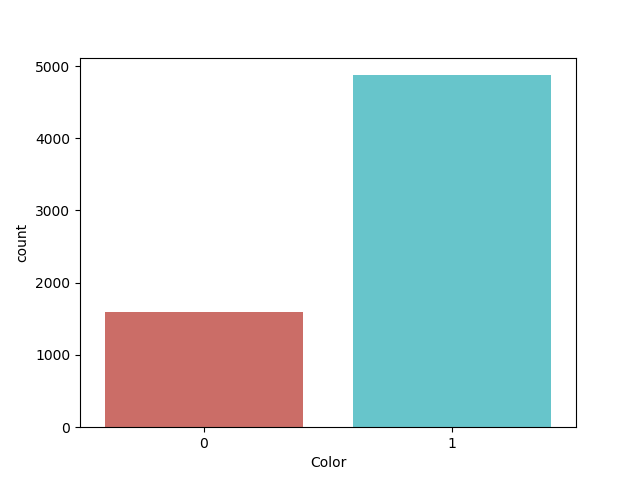

In [85]:
%matplotlib notebook
sns.countplot(x='Color',data=df3,palette='hls')
plt.show()
plt.savefig('count_plot')

In [93]:
df3.groupby('Color').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qua_3,qua_4,qua_5,qua_6,qua_7,qua_8,qua_9
Color,,,,,,,,,,,,,,,,,,
0,8.319383,0.525576,0.271605,2.538200,0.087246,15.905601,46.603524,0.996742,3.310566,0.658704,10.425928,0.0,0.033354,0.428571,0.401510,0.125236,0.011328,0.0
1,6.851149,0.277995,0.334131,6.393741,0.045756,35.236097,138.251283,0.994026,3.188147,0.489934,10.513253,0.0,0.033450,0.298994,0.451057,0.180587,0.035912,0.0


In [109]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(Xsc,y, test_size = 0.2, random_state=42)

In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20)
%time model.fit(train_X, train_y)

preds = model.predict(val_X)
# accuracy
(preds == val_y).mean()

model.intercept_, model.coef_



Wall time: 29.4 ms


C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([4.36690823]),
 array([[-0.08618691, -1.55580026,  0.19657705,  4.41490379, -0.69063722,
         -1.24897232,  3.15004143, -4.56731439,  0.04696356, -0.49820063,
         -1.81345633,  0.        ,  0.45343245, -0.03604718, -0.01248452,
         -0.22260679,  0.14496325,  0.        ]]))

# Evaluación del modelo

Exactitud

In [3]:
#hallar martriz de confusion
cm = metrics.confusion_matrix(val_y,preds)
print(cm)

SyntaxError: invalid syntax (<ipython-input-3-45ede675cff4>, line 4)

In [114]:
preds = model.prediccion(Xsc,0.5)
accuracy=(preds == train_y).mean()
print('se tiene un nivel de acierto del ' + str(accuracy*100) + '%','\n')

AttributeError: 'LogisticRegression' object has no attribute 'prediccion'

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, preds)
print(confusion_matrix)

[[34  2]
 [ 2 12]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.86      0.86      0.86        14

   micro avg       0.92      0.92      0.92        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.92      0.92      0.92        50



$J(\theta)=\frac{1}/{m} (-y^T log(h)-(1-y)^T log(1-h))$

$Accuracy=\frac{(TP+TN)}/{total}=\frac{(12+34)}/{50}=0.92$

$Precision=\frac{TP}/{(TP+FP)}= 12/(12+2)=0.86$

$Recall=sensitivity=\frac{TP}/{TP+TN}=12/(12+2)=0.86$

$specifity=\frac{TN}/{(TN+FN)}=34/(36)=0.94$

$Tasa FP=FPR=\frac{FP}/{(TN+FP)}=\frac{2}/{(2+12)}=0.14$


<IPython.core.display.Javascript object>


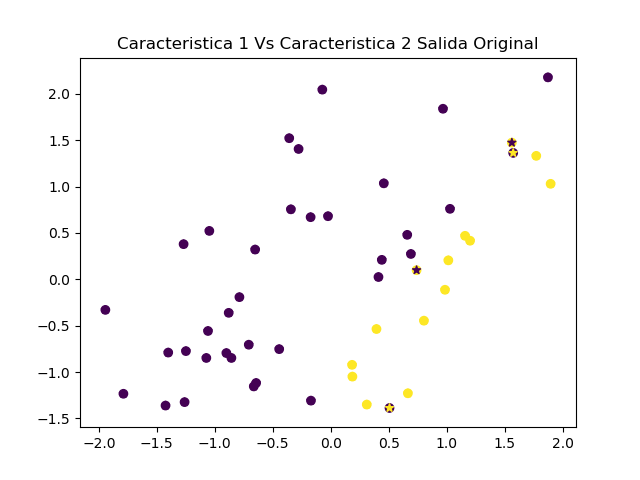

In [54]:
%matplotlib notebook
plt.title('Caracteristica 1 Vs Caracteristica 2 Salida Original')
plt.scatter(Xsc[:,0], Xsc[:,1],c = y,marker="o")
plt.scatter(Xsc[:,0], Xsc[:,1],c = preds,marker="*")
plt.show()

# Modelo hecho con la función de Logistic Regression de sklearn

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8 2]
 [0 5]]


Se tienen 13 predicciones correctas y 2 predicciones incorrectas

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.71      1.00      0.83         5

   micro avg       0.87      0.87      0.87        15
   macro avg       0.86      0.90      0.86        15
weighted avg       0.90      0.87      0.87        15



<IPython.core.display.Javascript object>


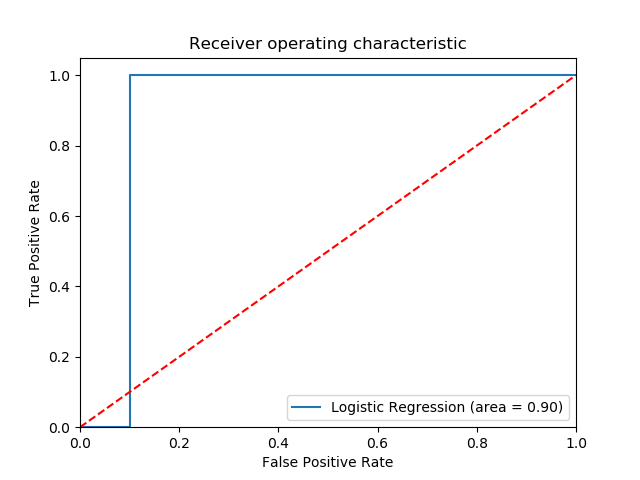

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
%time model.fit(Xsc, y)

loss: 0.6920009812985494 	
loss: 0.22285015682913836 	
loss: 0.22269154222177753 	
Wall time: 24.7 s


In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(y,Xsc)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.468338
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.210     
Dependent Variable: Trabaja          AIC:              50.8338   
Date:               2019-05-31 23:10 BIC:              54.6579   
No. Observations:   50               Log-Likelihood:   -23.417   
Df Model:           1                LL-Null:          -29.648   
Df Residuals:       48               LLR p-value:      0.00041542
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     2.0127      0.5349     3.7630    0.0002     0.9644     3.0611
x2    -1.2194      0.5079    -2.4008    0.0164    -2.2

In [37]:
preds = model.prediccion(Xsc,0.05)
(preds == y).mean()

0.82

In [11]:
import statistics as st
print("media de promedio= ",st.mean(datos['promedio']))
print("media de horas de estudio= ",st.mean(datos['horas_est']))

media de promedio=  3.161728
media de horas de estudio=  2.6732
